# 第九次作业

## 十臂赌博机  

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from tqdm import trange

In [2]:
class Bandit:
    def __init__(self, k_arm=10, epsilon=0., initial=0., step_size=0.1, true_reward=0.):
        self.k = k_arm
        self.step_size = step_size
        self.indices = np.arange(self.k)
        self.time = 0
        self.true_reward = true_reward
        self.epsilon = epsilon
        self.initial = initial
        
    def reset(self):
        # 每个动作的真实reward
        self.q_true = np.random.randn(self.k) + self.true_reward

        # 每个动作的估计
        self.q_estimation = np.zeros(self.k) + self.initial

        # 每个动作被选择的次数
        self.action_count = np.zeros(self.k)

        self.best_action = np.argmax(self.q_true)

        self.time = 0
        
    # 对当前赌博机选择要执行的动作
    def act(self):
        if np.random.rand() < self.epsilon:
            return np.random.choice(self.indices)

        q_best = np.max(self.q_estimation)
        return np.random.choice(np.where(self.q_estimation == q_best)[0])

    # 执行动作，更新动作的估值
    def step(self, action):
        # 生成动作的reward
        reward = np.random.randn() + self.q_true[action]
        self.time += 1
        self.action_count[action] += 1
        
        # 更新估值
        self.q_estimation[action] += self.step_size * (reward - self.q_estimation[action])
        return reward

In [3]:
# 模拟
def simulate(runs, time, bandits):
    rewards = np.zeros((len(bandits), runs, time))
    best_action_counts = np.zeros(rewards.shape)
    for i, bandit in enumerate(bandits):
        for r in trange(runs):
            bandit.reset()
            for t in range(time):
                action = bandit.act()
                reward = bandit.step(action)
                rewards[i, r, t] = reward
                if action == bandit.best_action:
                    best_action_counts[i, r, t] = 1
    mean_best_action_counts = best_action_counts.mean(axis=1)
    mean_rewards = rewards.mean(axis=1)
    return mean_best_action_counts, mean_rewards

In [12]:
def show(runs=2000, time=1000):
    bandits = []
    bandits.append(Bandit(epsilon=0, initial=5, step_size=0.1))
    bandits.append(Bandit(epsilon=0.1, initial=0, step_size=0.1))
    best_action_counts, _ = simulate(runs, time, bandits)

    plt.plot(best_action_counts[0], label='epsilon = 0, q = 5')
    plt.plot(best_action_counts[1], label='epsilon = 0.1, q = 0')
    plt.xlabel('Steps')
    plt.ylabel('% optimal action')
    plt.legend()

    plt.show()
    plt.close()

100%|██████████████████████████████████████████████████████████████████████████████| 2000/2000 [00:46<00:00, 43.42it/s]


[[0.0975 0.1025 0.1035 ... 0.855  0.853  0.8535]
 [0.096  0.133  0.172  ... 0.755  0.7695 0.76  ]]


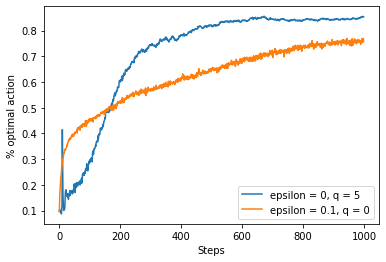

In [13]:
show()

&emsp;&emsp;乐观初始化分析方法在曲线的早期会出现振荡和峰值的原因：  
&emsp;&emsp;在这个问题中，$~q_{*}(a)~$是按照均值为$~0~$方差为$~1~$的正态分布选择的。因此$~+5~$的初始值是一个过度乐观的估计，但是这种乐观的初始估计却会鼓励动作-价值方法去试探。因为无论哪一种动作被选择，收益都比最开始的估计值要小；因此学习器会对得到的收益感到“失望”，从而转向另一个动作。其结果是，所有动作在估计值收敛之前都被尝试了好几次。即使每一次都按照贪心法选择动作，系统也会进行大量的试探。  
&emsp;&emsp;也就是说在开始的时候，估计值过于乐观，收益都比最开始的估计值小，便会尝试另一种动作，于是导致在开始的时候形成周期为k的振荡，直到估计值接近真实值。当初始值更大时，效果更明显。

In [14]:
def show(runs=2000, time=1000):
    bandits = []
    bandits.append(Bandit(epsilon=0, initial=50, step_size=0.1))
    bandits.append(Bandit(epsilon=0.1, initial=0, step_size=0.1))
    best_action_counts, _ = simulate(runs, time, bandits)

    plt.plot(best_action_counts[0], label='epsilon = 0, q = 50')
    plt.plot(best_action_counts[1], label='epsilon = 0.1, q = 0')
    plt.xlabel('Steps')
    plt.ylabel('% optimal action')
    plt.legend()

    plt.show()
    plt.close()

100%|██████████████████████████████████████████████████████████████████████████████| 2000/2000 [00:49<00:00, 40.72it/s]


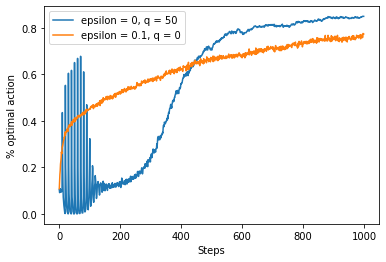

In [15]:
show()